Import all of the useful libraries

In [4]:
%matplotlib widget
from qutip import Bloch, Bloch3d
import matplotlib.pyplot as plt
import vis_tools as vt
import op_tools as ot
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from numpy import linspace, outer, cos, sin, ones, size, pi, arange,concatenate, around, real
import GateLibrary2 as gl
from sympy import N


First, we'll start by defining our Bloch sphere

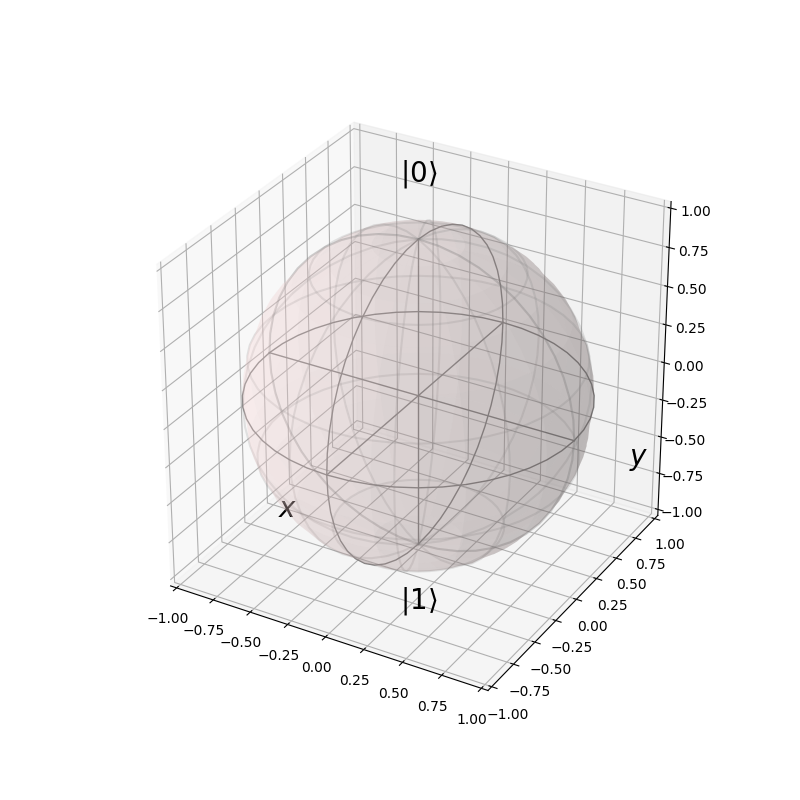

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
vt.draw_bloch(ax)

In [6]:
points = vt.div_sphere(12)
points[0]


[0.25881904510252074, 0.0, 0.9659258262890683]

In [7]:
trans_points = ot.transform_points(points, gl.amplitude_damping(1,0.8))

In [8]:
X, Y, Z = vt.points2XYZ(trans_points)

ax.scatter(X,Y,Z, cmap = 'viridis', s = 25, c = Z, edgecolors= 'black')

c:\Users\cahya\anaconda3\envs\QutipBRIN\lib\site-packages\matplotlib\axes\_axes.py:4186: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)
c:\Users\cahya\anaconda3\envs\QutipBRIN\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\cahya\anaconda3\envs\QutipBRIN\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [9]:
etas_1 = arange(0,1.02,0.02)
etas_2 = arange(1,-0.02, -0.02)
etas = around(concatenate([etas_1,etas_2]), decimals= 2)

ps = around(concatenate([arange(0,1.02,0.02),arange(1,-0.02,-0.02)]), decimals= 2)

In [10]:
# Now, we're going to animate amplitude damping

num_frames = len(ps)


for n in range(len(ps)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)
    ax.set_title('$p$ = ' + str(ps[n]), fontsize = 20)
    ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
    trans_points = ot.transform_points(points, gl.choose_gate(ps[n],3))
    vt.draw_bloch(ax)
    X,Y,Z = vt.points2XYZ(trans_points)
    c = linspace(1,0,len(Z))
    #print(X,Y,Z)
    ax.scatter(real(Y),real(X),real(Z), cmap = 'viridis', s = 25, c = c, edgecolors= 'black')
    plt.savefig(f"{n}.png")
    plt.close()

    

In [ ]:
from PIL import Image

images = [Image.open(f"{n}.png") for n in range(len(etas))]

images[0].save('phaseflip.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

1j
